## Importing Libraries and Loading Data

In [1]:
import warnings
warnings.filterwarnings('ignore')

import keras
import matplotlib.pyplot as plt # for plotting
import os # provides a way of using operating system dependent functionality
import cv2 #Image handling library
import numpy as np

# Import of keras model and hidden layers for our convolutional network
from keras.layers import Conv2D, Activation, MaxPool2D, Dense, Flatten, Dropout

In [5]:
# paths for dataset
data_path = os.path.abspath("C:/Users/ASUS/Documents/Prodigy_Tasks/Dataset/leapGestRecog")
print(os.getcwd())

C:\Users\ASUS


In [2]:
import os
print(os.listdir(r"C:\Users\ASUS\Documents\Prodigy_Tasks\Dataset\leapGestRecog"))

['00', '01', '02', '03', '04', '05', '06', '07', '08', '09']


In [7]:
import os
import cv2

CATEGORIES = ["01_palm", '02_l','03_fist','04_fist_moved','05_thumb','06_index','07_ok','08_palm_moved','09_c','10_down']
IMG_SIZE = 50

data_path = r"C:\Users\ASUS\Documents\Prodigy_Tasks\Dataset\leapGestRecog"

image_data = []
for root, dirs, files in os.walk(data_path):
    for dir in dirs:
        if dir in CATEGORIES:
            class_index = CATEGORIES.index(dir)
            dir_path = os.path.join(root, dir)
            for file in os.listdir(dir_path):
                img_path = os.path.join(dir_path, file)
                img_arr = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
                image_data.append([cv2.resize(img_arr, (IMG_SIZE, IMG_SIZE)), class_index])

if image_data:
    print(image_data[0])
else:
    print("No images found")

[array([[5, 4, 4, ..., 3, 4, 2],
       [5, 4, 5, ..., 3, 3, 3],
       [4, 5, 4, ..., 4, 5, 3],
       ...,
       [4, 5, 5, ..., 5, 5, 5],
       [5, 5, 6, ..., 5, 7, 4],
       [4, 7, 5, ..., 5, 4, 4]], dtype=uint8), 0]


In [12]:
# shuffle the input data
import random
random.shuffle(image_data)

In [13]:
input_data = []
label = []
for X, y in image_data:
    input_data.append(X)
    label.append(y)

In [14]:
label[:10]

[8, 5, 5, 2, 7, 8, 4, 7, 9, 0]

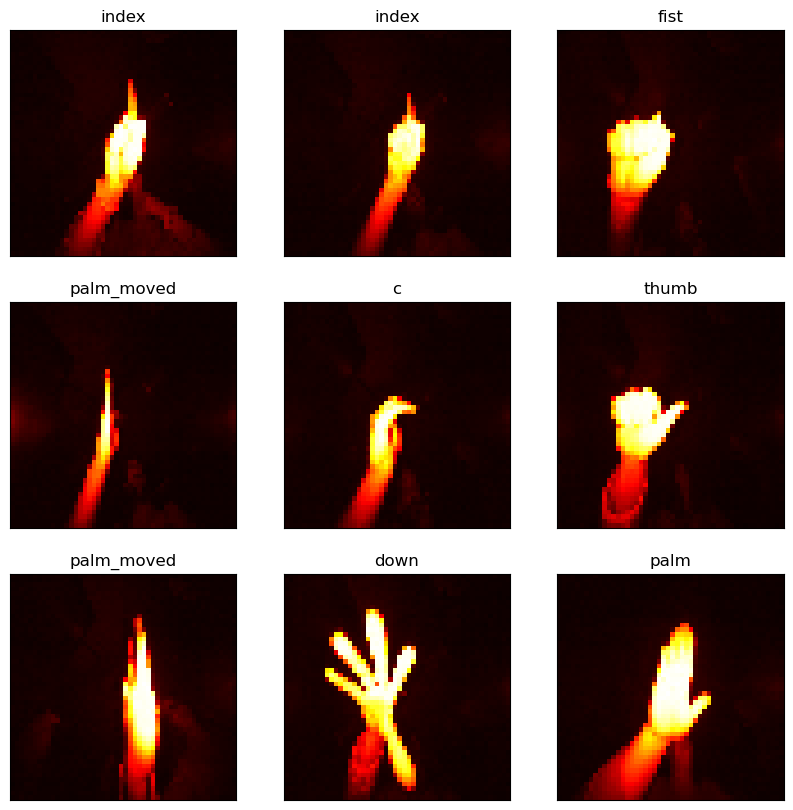

In [16]:
import matplotlib.pyplot as plt
plt.figure(1, figsize=(10,10))
for i in range(1,10):
    plt.subplot(3,3,i)
    plt.imshow(image_data[i][0], cmap='hot')
    plt.xticks([])
    plt.yticks([])
    plt.title(CATEGORIES[label[i]][3:])
plt.show()

In [18]:
# Normalizing the data
import numpy as np
input_data = np.array(input_data)
label = np.array(label)
input_data = input_data/255.0
input_data.shape

(20000, 50, 50)

In [21]:
# one hot encoding
import tensorflow as tf
from tensorflow import keras
label = keras.utils.to_categorical(label, num_classes=10)
label[0]

array([0., 0., 0., 0., 0., 0., 0., 0., 1., 0.])

In [22]:
# reshaping the data
input_data.shape = (-1, IMG_SIZE, IMG_SIZE, 1)

In [23]:
# splitting the input_data to train and test data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(input_data, label, test_size = 0.3, random_state=0)

## Model Architecture

In [30]:
from tensorflow.keras.layers import Conv2D, Activation, MaxPooling2D, Dropout, Flatten, Dense
model = keras.models.Sequential()

model.add(Conv2D(filters = 32, kernel_size = (3,3), input_shape = (IMG_SIZE, IMG_SIZE, 1)))
model.add(Activation('relu'))


model.add(Conv2D(filters = 32, kernel_size = (3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.3))

model.add(Conv2D(filters = 64, kernel_size = (3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.3))

model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy',
             optimizer = 'rmsprop',
             metrics = ['accuracy'])

In [31]:
model.fit(X_train, y_train, epochs = 7, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/7
438/438 ━━━━━━━━━━━━━━━━━━━━ 16s 34ms/step - accuracy: 0.6873 - loss: 0.9184 - val_accuracy: 0.9973 - val_loss: 0.0092
Epoch 2/7
438/438 ━━━━━━━━━━━━━━━━━━━━ 15s 34ms/step - accuracy: 0.9932 - loss: 0.0238 - val_accuracy: 0.9990 - val_loss: 0.0032
Epoch 3/7
438/438 ━━━━━━━━━━━━━━━━━━━━ 16s 37ms/step - accuracy: 0.9970 - loss: 0.0083 - val_accuracy: 0.9993 - val_loss: 0.0011
Epoch 4/7
438/438 ━━━━━━━━━━━━━━━━━━━━ 16s 36ms/step - accuracy: 0.9989 - loss: 0.0048 - val_accuracy: 0.9997 - val_loss: 5.4047e-04
Epoch 5/7
438/438 ━━━━━━━━━━━━━━━━━━━━ 16s 37ms/step - accuracy: 0.9991 - loss: 0.0024 - val_accuracy: 0.9983 - val_loss: 0.0037
Epoch 6/7
438/438 ━━━━━━━━━━━━━━━━━━━━ 16s 36ms/step - accuracy: 0.9993 - loss: 0.0021 - val_accuracy: 0.9998 - val_loss: 2.8475e-04
Epoch 7/7
438/438 ━━━━━━━━━━━━━━━━━━━━ 16s 37ms/step - accuracy: 0.9992 - loss: 0.0023 - val_accuracy: 0.9997 - val_loss: 6.0449e-04


In [32]:
model.summary()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_12 (Conv2D)                   │ (None, 48, 48, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_12 (Activation)           │ (None, 48, 48, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_13 (Conv2D)                   │ (None, 46, 46, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_13 (Activation)           │ (None, 46, 46, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 23, 23, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 23, 23, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_14 (Conv2D)                   │ (None, 21, 21, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_14 (Activation)           │ (None, 21, 21, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 10, 10, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 10, 10, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 6400)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 256)                 │       1,638,656 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 10)                  │           2,570 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,338,582 (12.74 MB)

 Trainable params: 1,669,290 (6.37 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 1,669,292 (6.37 MB)

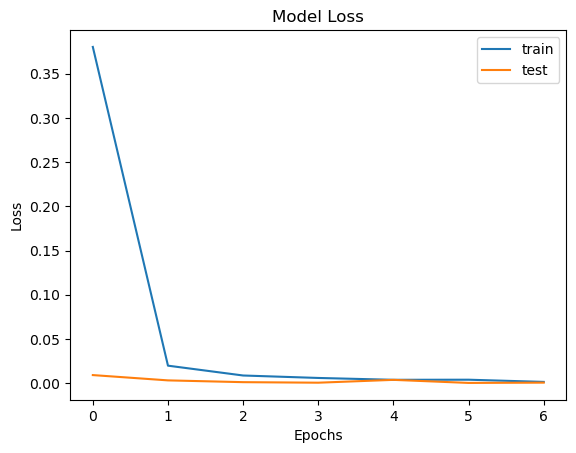

In [33]:
plt.plot(model.history.history['loss'])
plt.plot(model.history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train', 'test'])
plt.show()

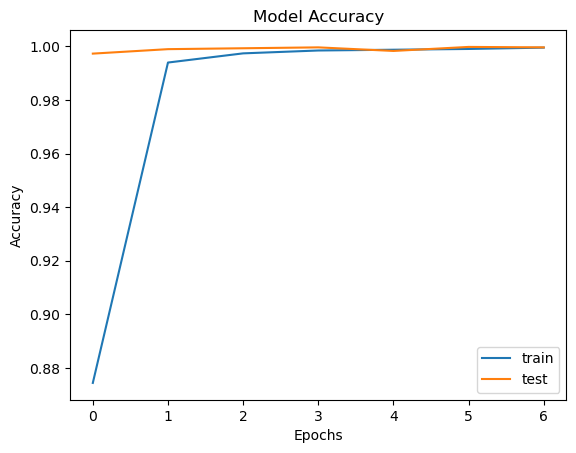

In [34]:
plt.plot(model.history.history['accuracy'])
plt.plot(model.history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'test'])
plt.show()

## Model Evaluation

In [35]:
#calculate loss and accuracy on test data

test_loss, test_accuracy = model.evaluate(X_test, y_test)

print('Test accuracy: {:2.2f}%'.format(test_accuracy*100))

188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.9996 - loss: 7.4149e-04
Test accuracy: 99.97%
